In [2]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

C:\Users\rladh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
df.describe() # 빈도수, 평균, 분산, 최솟값, 최댓값, 1/4분위수, 중위값, 1/4분위수를 나타냄

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [5]:
df.std() # 분산 출력

admit      0.466087
gre      115.516536
gpa        0.380567
rank       0.944460
dtype: float64

In [9]:
pd.crosstab(df['admit'], df['rank'], rownames=['admit'])

rank,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


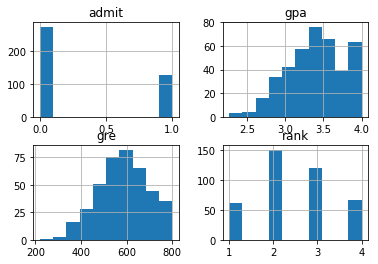

In [10]:
df.hist()
pl.show() #그래프로 요약

In [5]:
dummy_ranks = pd.get_dummies(df['rank'], prefix='rank')
dummy_ranks.head()
#rank를 더미변수화

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [6]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'rank_2':])
data.head()

C:\Users\rladh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [7]:
data['intercept'] = 1.0

In [8]:
data

,admit,gre,gpa,rank_2,rank_3,rank_4,intercept
0,0,380,3.61,0,1,0,1.0
1,1,660,3.67,0,1,0,1.0
2,1,800,4.00,0,0,0,1.0
3,1,640,3.19,0,0,1,1.0
4,0,520,2.93,0,0,1,1.0
5,1,760,3.00,1,0,0,1.0
6,1,560,2.98,0,0,0,1.0
7,0,400,3.08,1,0,0,1.0
8,1,540,3.39,0,1,0,1.0
9,0,700,3.92,1,0,0,1.0


In [19]:
train_cols = data.columns[1:]
train_cols

Index(['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4'], dtype='object')

In [20]:
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()
result.summary()
#R결과와 마찬가지로 모든 변수가 유의함

Optimization terminated successfully.
         Current function value: 0.589306
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Thu, 08 Mar 2018   Pseudo R-squ.:                 0.05707
Time:                        16:26:27   Log-Likelihood:                -235.72
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 9.732e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0014      0.001      1.329      0.184      -0.001       0.003
gpa           -0.1336      0.194     -0.687      0.492      -0.515       0.248
rank_2        -0.9663      0.300     -3.216      0.001      -1.555      -0.377
rank_3        -1.5451      0.332     -4.648      0.000      -2.197      -0.894
rank_4        -1.8776      0.402     -4.676      0.000      -2.665      -1.091
==============================================================================
"""

In [21]:
np.exp(result.params)#오즈비 계산

gre       1.001388
gpa       0.874961
rank_2    0.380495
rank_3    0.213297
rank_4    0.152958
dtype: float64